# Centrality Measures for School Network

## Importing Libraries and Loading Networks

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

G1 = nx.read_gml("DatasetS1.GML", label='id')
G2 = nx.read_gml("DatasetS2.GML", label='id')

## Setting the Layout: Fruchterman-Reingold

Position nodes using Fruchterman-Reingold force-directed algorithm.

The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects, sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium.

https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

In [3]:
pos = nx.spring_layout(G1, seed=57)

## Function to Plot Centrality Measure Network

In [4]:
def plot_centrality_measure_network(G, measures, title, size_scale_factor):
    # to plot labels
    node_measure_dict = {node: f'{measure:.2f}' for node, measure in zip(G.nodes, measures)}

    # network plot
    fig = plt.figure(figsize=(20, 15))
    nc = nx.draw_networkx_nodes(G, pos, node_size=measures * size_scale_factor, cmap=plt.cm.RdYlBu_r, node_color=measures, linewidths=0.6, edgecolors='black')
    nx.draw_networkx_edges(G, pos, alpha=0.500, edge_color='azure')
    nx.draw_networkx_labels(G, pos, font_color='purple', labels=node_measure_dict)
    cbar = plt.colorbar(nc)
    cbar.ax.yaxis.set_ticks_position('left')
    cbar.ax.yaxis.set_label_position('right')
    cbar.ax.set_ylabel(title, rotation=270, labelpad=10) 
    plt.title(title, fontdict={'fontsize': 30})
    plt.show()

## Degree Centrality

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html

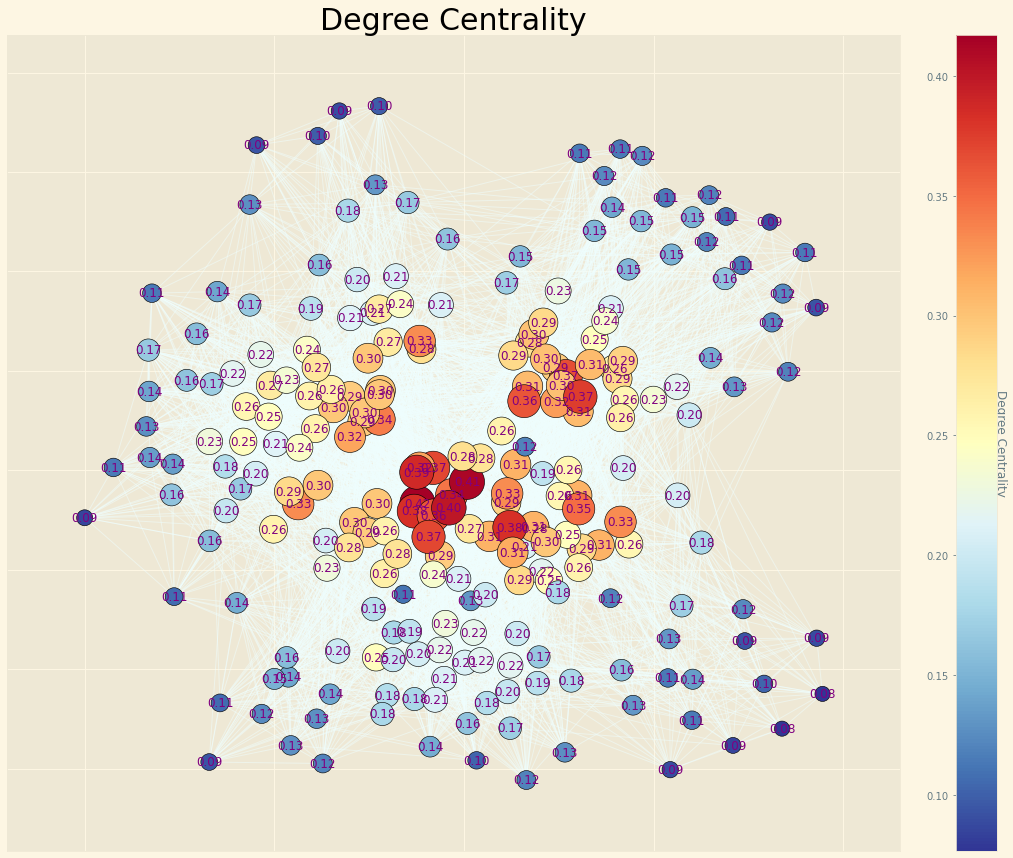

In [5]:
degree_centralities = np.array(list(nx.degree_centrality(G1).values()))
plot_centrality_measure_network(G1, degree_centralities, 'Degree Centrality', size_scale_factor=3000)

## Closeness Centrality

The closeness centrality is normalized to (n-1)/(|G|-1) where n is the number of nodes in the connected part of graph containing the node. If the graph is not completely connected, this algorithm computes the closeness centrality for each connected part separately scaled by that parts size. 

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html

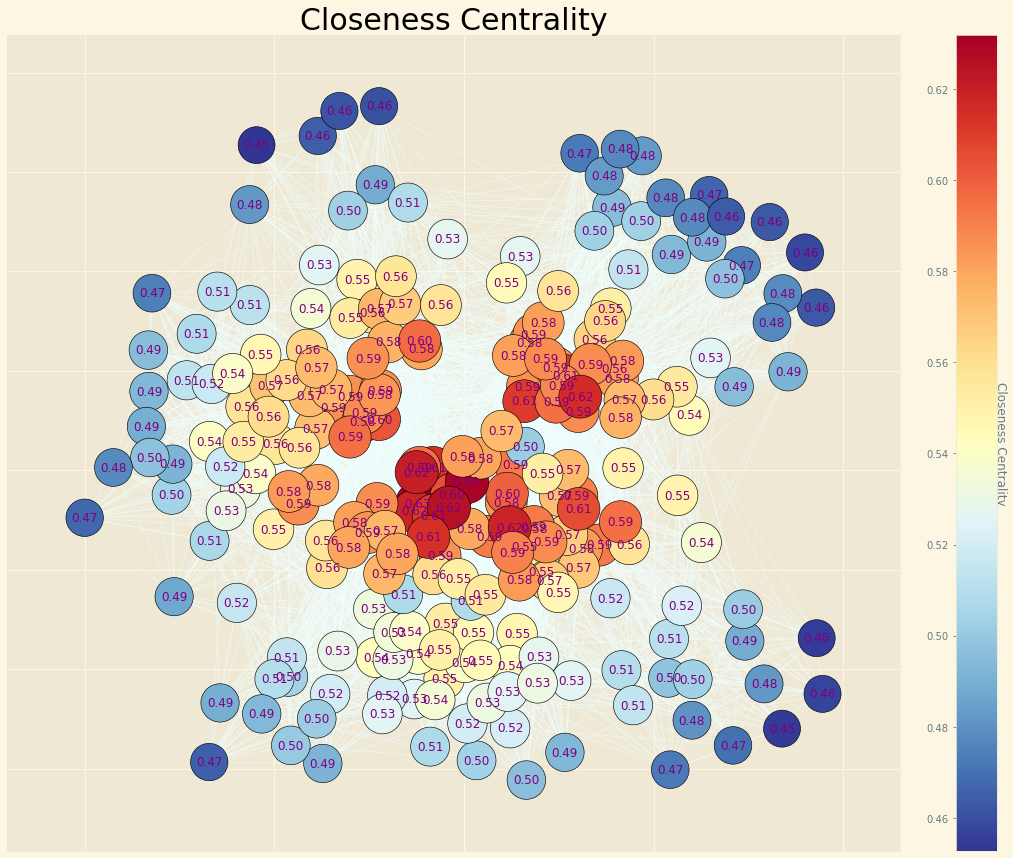

In [72]:
closeness_centralities = np.array(list(nx.closeness_centrality(G1).values()))
plot_centrality_measure_network(G1, closeness_centralities, 'Closeness Centrality', size_scale_factor=3000)

## Farness Centrality (Inverse of Closeness)

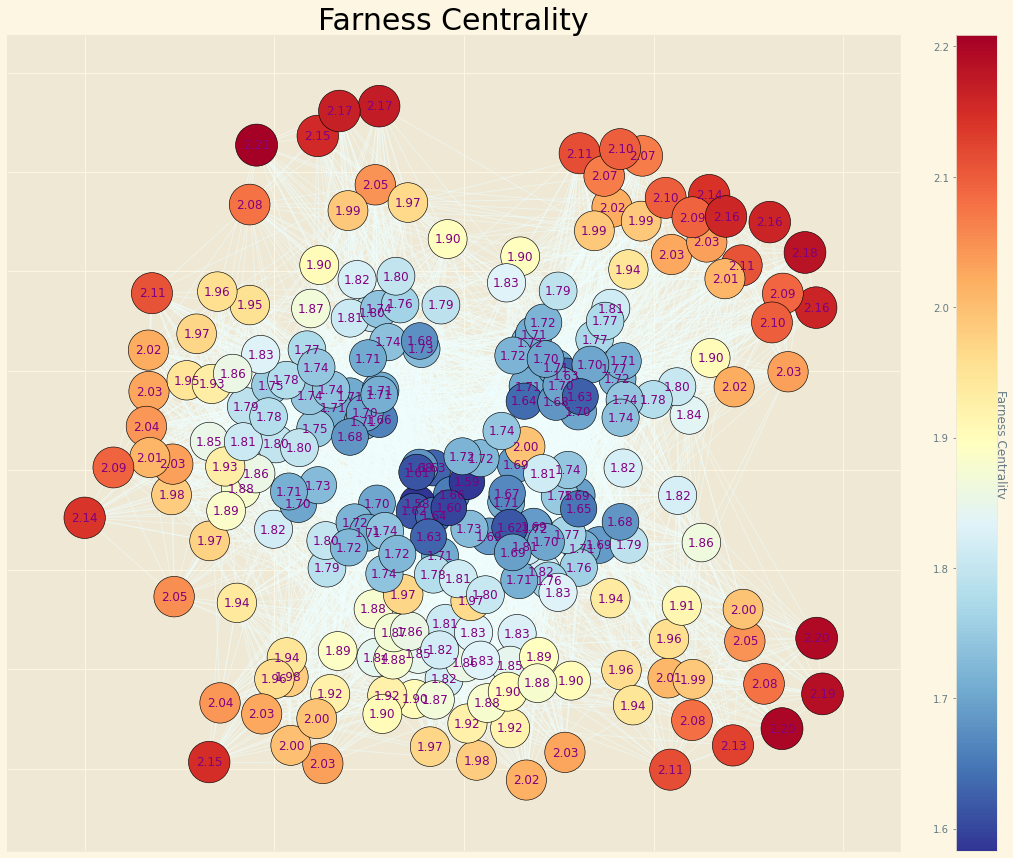

In [71]:
plot_centrality_measure_network(G1, 1.0/closeness_centralities, 'Farness Centrality', size_scale_factor=800)

## Betweenness Centrality

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html

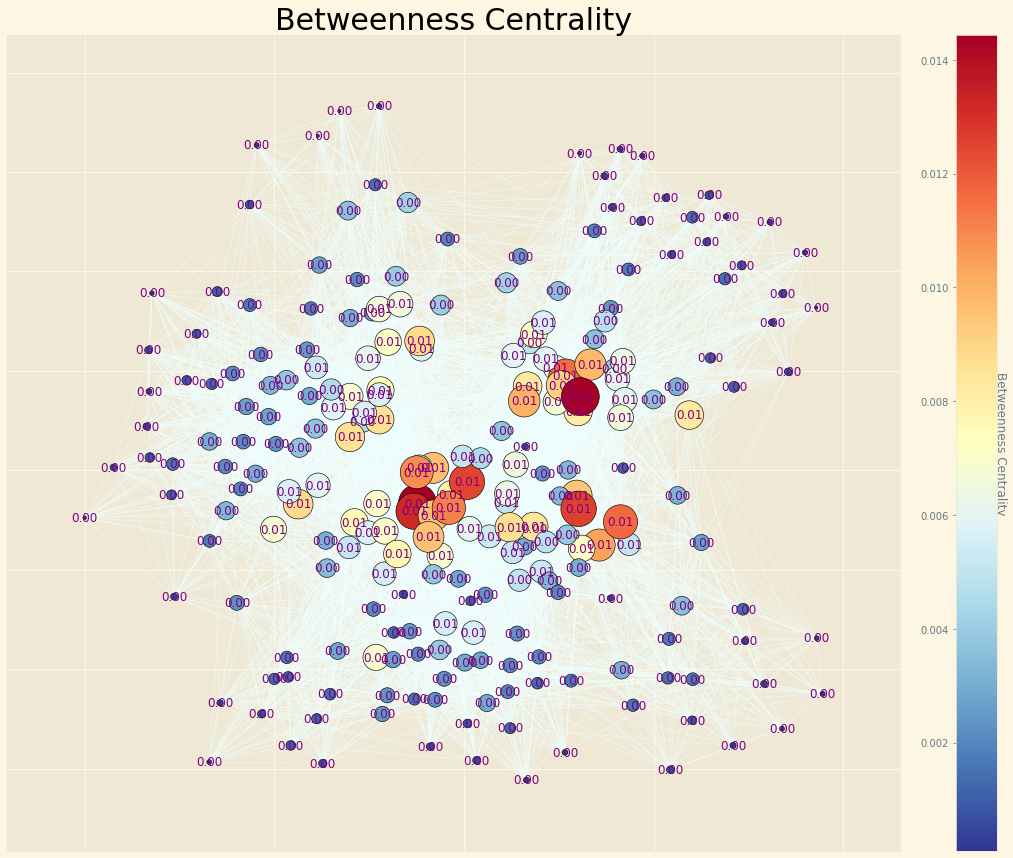

In [7]:
betweenness_centralities = np.array(list(nx.betweenness_centrality(G1).values()))
plot_centrality_measure_network(G1, betweenness_centralities, 'Betweenness Centrality', size_scale_factor=100000)

## Eigenvector Centrality

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html

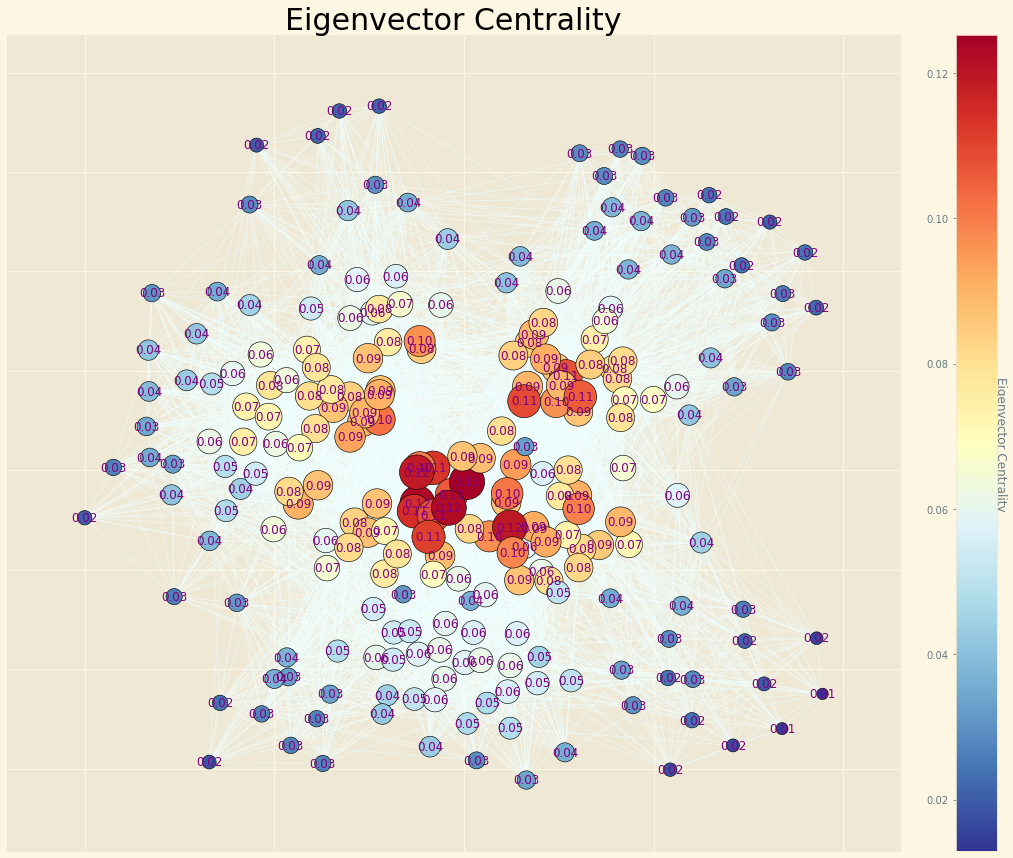

In [8]:
eigenvector_centralities = np.array(list(nx.eigenvector_centrality(G1).values()))
plot_centrality_measure_network(G1, eigenvector_centralities, 'Eigenvector Centrality', size_scale_factor=10000)

## Eccentricity Centrality

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.eccentricity.html

In [9]:
def plot_eccentricity_network(G, measures, title, size_scale_factor):
    # to plot labels
    node_measure_dict = {node: int(measure) for node, measure in zip(G.nodes, measures)}

    # network plot
    fig = plt.figure(figsize=(20, 15))
    nc = nx.draw_networkx_nodes(G, pos, node_size=measures * size_scale_factor, cmap=plt.cm.RdYlBu_r, node_color=measures, linewidths=0.6, edgecolors='black')
    nx.draw_networkx_edges(G, pos, alpha=0.500, edge_color='azure')
    nx.draw_networkx_labels(G, pos, font_color='white', labels=node_measure_dict)
    cbar = plt.colorbar(nc)
    cbar.ax.yaxis.set_ticks_position('left')
    cbar.ax.yaxis.set_label_position('right')
    cbar.ax.set_ylabel(title, rotation=270, labelpad=10) 
    plt.title(title, fontdict={'fontsize': 30})
    plt.show()

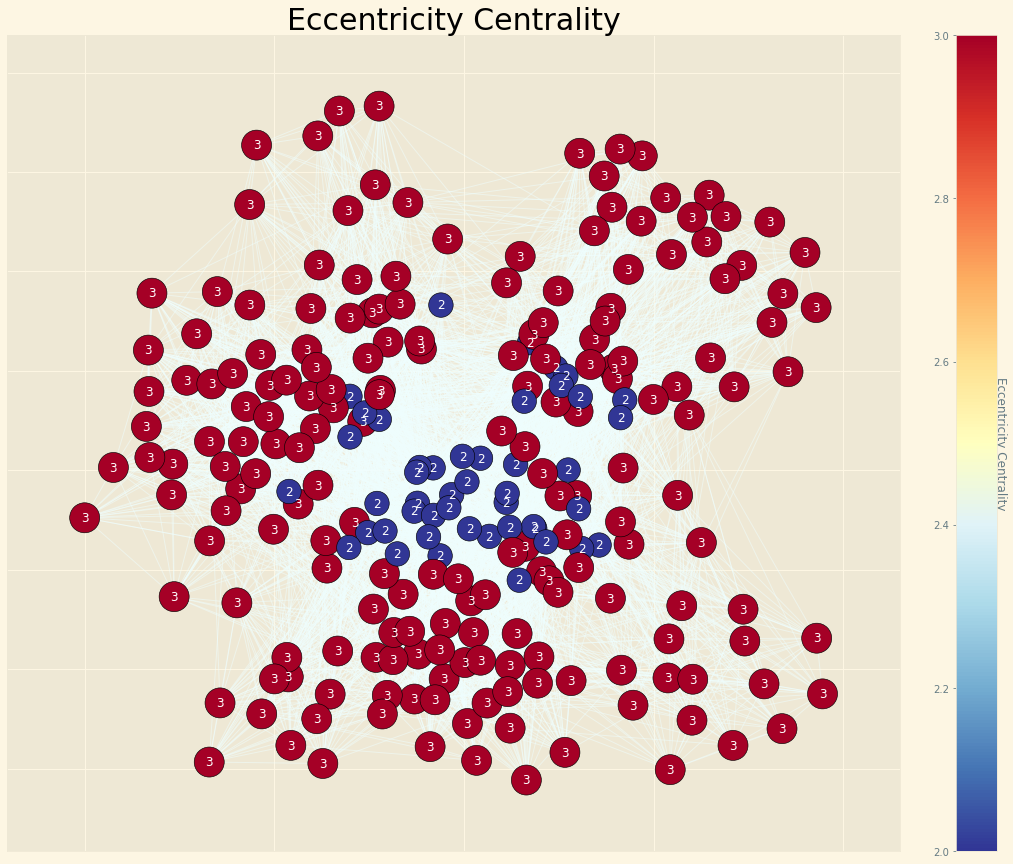

In [10]:
eccentricity_centralities = np.array(list(nx.eccentricity(G1).values()))
plot_eccentricity_network(G1, eccentricity_centralities, 'Eccentricity Centrality', size_scale_factor=300)

## Diameter (Maximum Eccentricity)

In [78]:
diameter_G1 = nx.diameter(G1)

HTML(f'<h2>Diameter: <b>{diameter_G1}</b></h2>')

## Radius (Minimum Eccentricity)

In [79]:
radium_G1 = nx.radius(G1)
HTML(f'<h2>Radius: <b>{radium_G1}</b></h2>')

## Clustering Coefficient

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering

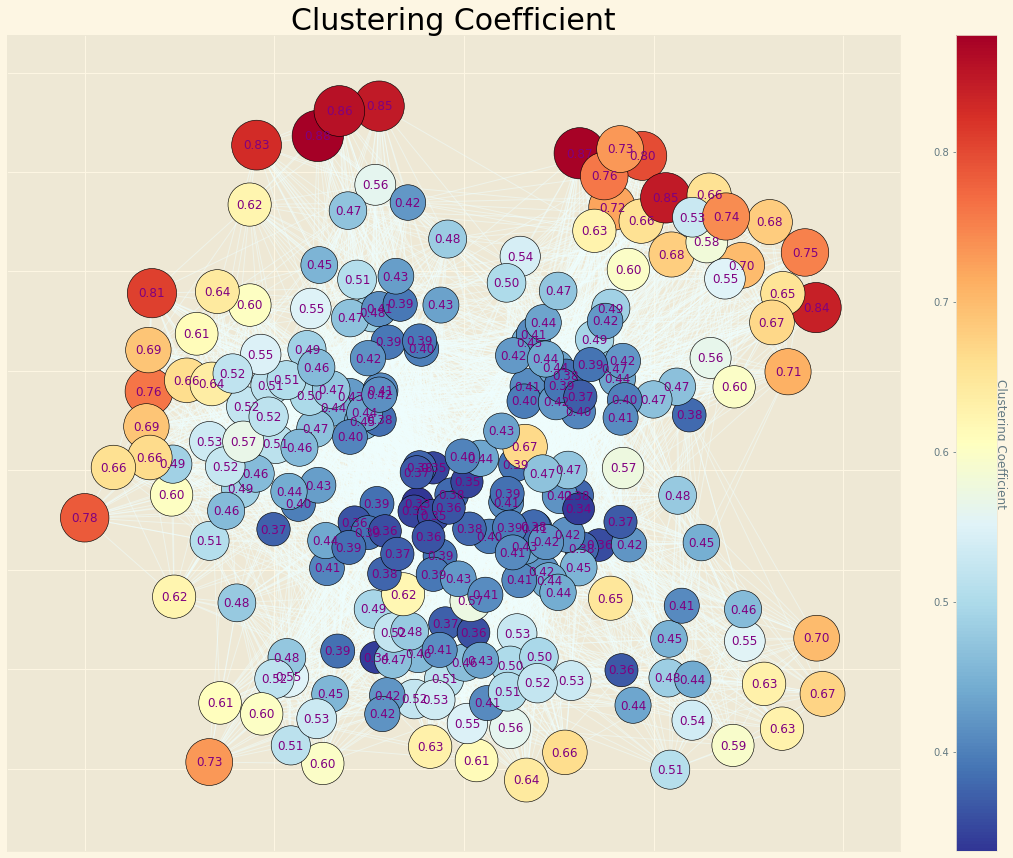

In [11]:
clustering_coefficients = np.array(list(nx.clustering(G1).values()))
plot_centrality_measure_network(G1, clustering_coefficients, 'Clustering Coefficient', size_scale_factor=3000)

## Triangles Count

In [12]:
def plot_triangles_network(G, measures, title, size_scale_factor):
    # to plot labels
    node_measure_dict = {node: int(measure) for node, measure in zip(G.nodes, measures)}

    # network plot
    fig = plt.figure(figsize=(20, 15))
    nc = nx.draw_networkx_nodes(G, pos, node_size=measures * size_scale_factor, cmap=plt.cm.RdYlBu_r, node_color=measures, linewidths=0.6, edgecolors='black')
    nx.draw_networkx_edges(G, pos, alpha=0.500, edge_color='azure')
    nx.draw_networkx_labels(G, pos, font_color='purple', labels=node_measure_dict)
    cbar = plt.colorbar(nc)
    cbar.ax.yaxis.set_ticks_position('left')
    cbar.ax.yaxis.set_label_position('right')
    cbar.ax.set_ylabel(title, rotation=270, labelpad=10) 
    plt.title(title, fontdict={'fontsize': 30})
    plt.show()

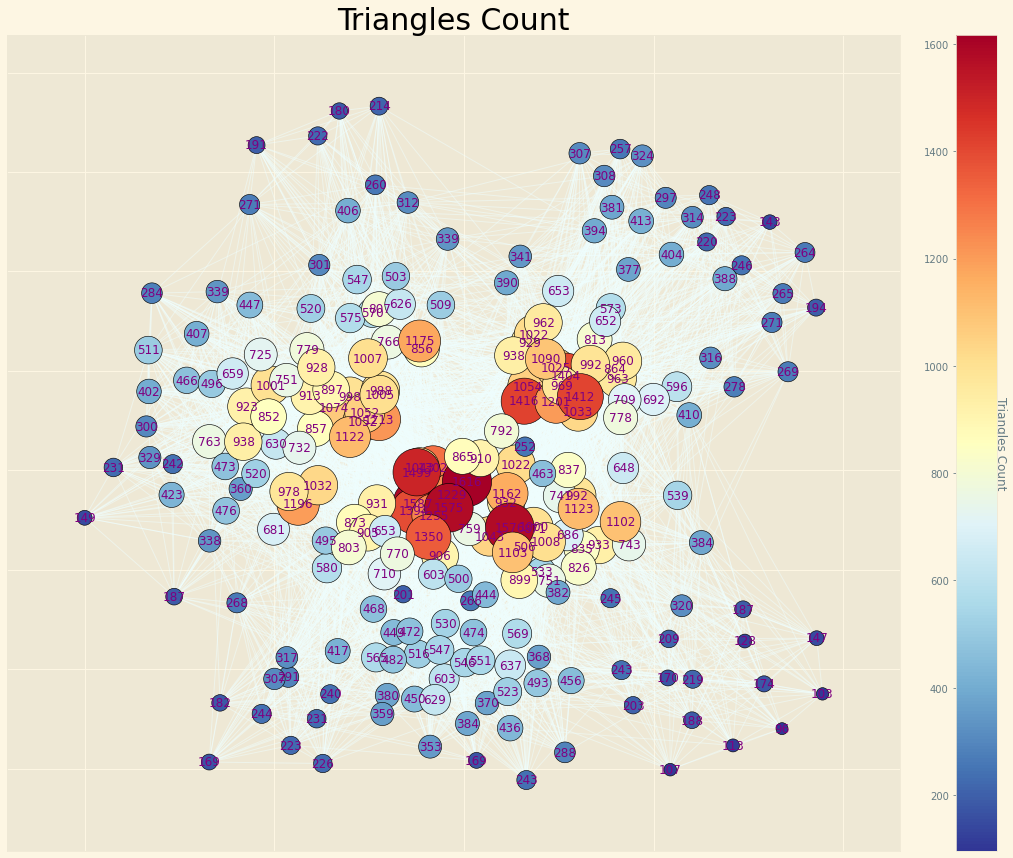

In [13]:
triangles_count = np.array(list(nx.triangles(G1).values()))
plot_triangles_network(G1, triangles_count, 'Triangles Count', size_scale_factor=1.5)

# Global Measures

Each of the global measures were calculated for the networks of each day.

## Degree Distribution and Global Average Degree

In [14]:
def plot_degree_distribution(degrees, title):
    fig = plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=100)
    plt.axvline(x=np.mean(degrees), color='red', linestyle='--', label=f'Average Degree $<k>$: {np.mean(degrees):.2f}')
    plt.xlabel('Degree [ $k$ ]')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.show()

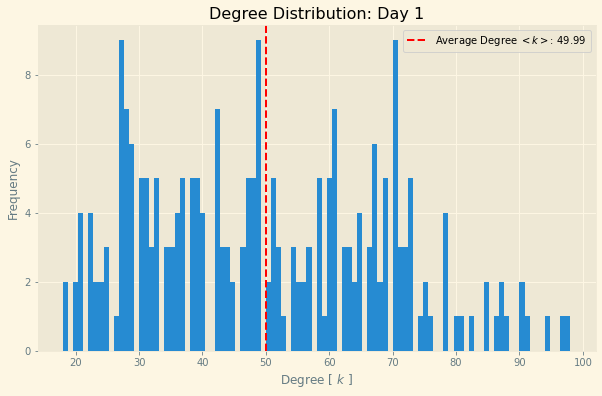

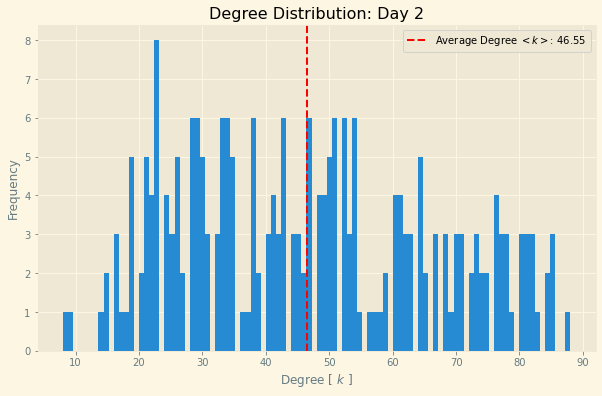

In [15]:
degrees_G1 = np.array([t[1] for t in G1.degree()])
degrees_G2 = np.array([t[1] for t in G2.degree()])
plot_degree_distribution(degrees_G1, 'Degree Distribution: Day 1')
plot_degree_distribution(degrees_G2, 'Degree Distribution: Day 2')

## Average Path Length

In [25]:
from IPython.core.display import HTML

APL_G1 = nx.average_shortest_path_length(G1)
APL_G2 = nx.average_shortest_path_length(G2)

APL_G1_str = f'{APL_G1:.2f}'
APL_G2_str = f'{APL_G2:.2f}'
HTML(f'<h2>Day 1 Avg. Path Length: <b>{APL_G1_str}</b></h2><h2>Day 2 Avg. Path Length: <b>{APL_G2_str}</b></h2>')

## Average Clustering Coefficient

In [24]:
ACL_G1 = nx.average_clustering(G1)
ACL_G2 = nx.average_clustering(G2)

ACL_G1_str = f'{ACL_G1:.2f}'
ACL_G2_str = f'{ACL_G2:.2f}'
HTML(f'<h2>Day 1 Avg. Clustering Coeff.: <b>{ACL_G1_str}</b></h2><h2>Day 2 Avg. Clustering Coeff.: <b>{ACL_G2_str}</b></h2>')

## Average Clustering Coefficient per Degree $C(k)$

In [26]:
def plot_avg_clustering_coeff_per_degree(degrees, ck, title):
    fig = plt.figure(figsize=(10, 6))
    plt.plot(degrees, ck, '*-', color='darkmagenta')
    plt.xlabel('Degree [ $k$ ]')
    plt.ylabel('Average Clustering Coefficient $C(k)$')
    plt.title(title)
    plt.legend()
    plt.show()

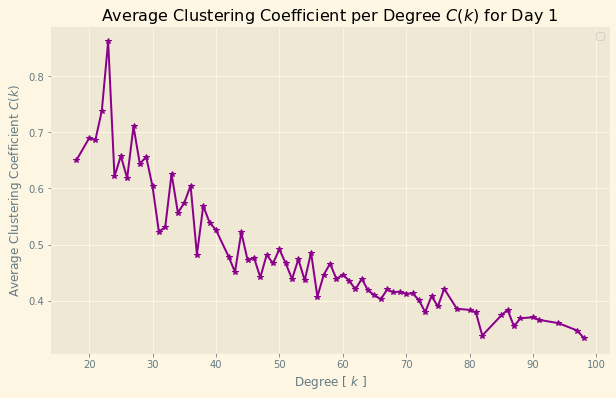

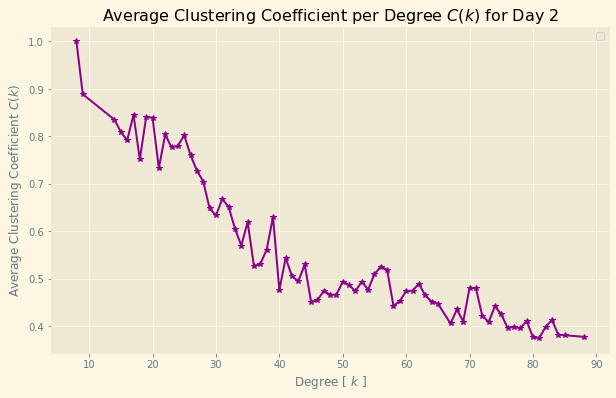

In [27]:
clustering_coefficients_G1 = np.array(list(nx.clustering(G1).values()))
clustering_coefficients_G2 = np.array(list(nx.clustering(G2).values()))

udegrees_G1 = np.unique(degrees_G1)
ck_G1 = np.zeros(len(udegrees_G1))
for i, d in enumerate(udegrees_G1):
    ck_G1[i] = np.mean(clustering_coefficients_G1[degrees_G1 == d])

udegrees_G2 = np.unique(degrees_G2)
ck_G2 = np.zeros(len(udegrees_G2))
for i, d in enumerate(udegrees_G2):
    ck_G2[i] = np.mean(clustering_coefficients_G2[degrees_G2 == d])

plot_avg_clustering_coeff_per_degree(udegrees_G1, ck_G1, 'Average Clustering Coefficient per Degree $C(k)$ for Day 1')
plot_avg_clustering_coeff_per_degree(udegrees_G2, ck_G2, 'Average Clustering Coefficient per Degree $C(k)$ for Day 2')

## Assortativity Coefficients

In [62]:
def plot_assortativity_bar_plot(numbers, labels, title):

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(labels, numbers, color=['lightseagreen' if n>=0 else 'tomato' for n in numbers])

    # Add numbers on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height+0.05, f'{height:.3f}', ha='center', va='bottom')

    # Draw a horizontal line at y=0
    ax.axhline(y=0, color='k', linewidth=1)

    # Set the y-axis limits to -1 and 1
    ax.set_ylim(-1, 1)

    # Set axis labels and title
    ax.set_ylabel('Assortativity')
    ax.set_title(title)

    plt.show()

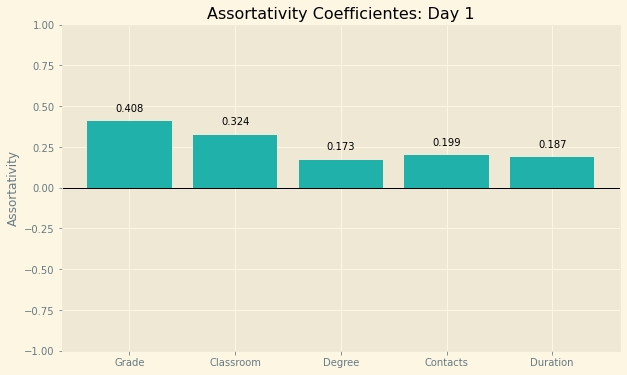

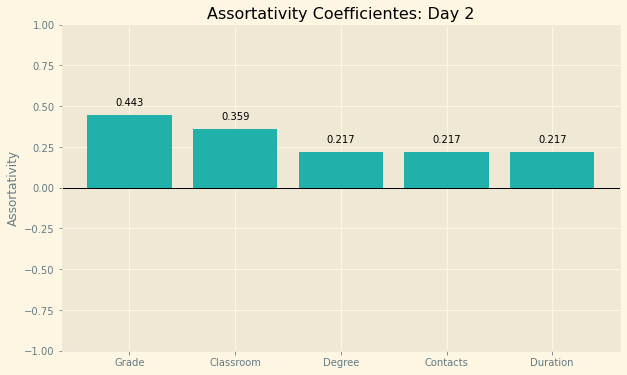

In [64]:
AG1 = nx.read_gml("DatasetS1_Attributes.gml", label='id')
AG2 = nx.read_gml("DatasetS2_Attributes.gml", label='id')

assort_grade_G1 = nx.attribute_assortativity_coefficient(AG1, 'grade')
assort_grade_G2 = nx.attribute_assortativity_coefficient(AG2, 'grade')

assort_classroom_G1 = nx.attribute_assortativity_coefficient(AG1, 'classroom')
assort_classroom_G2 = nx.attribute_assortativity_coefficient(AG2, 'classroom')

assort_degree_G1 = nx.degree_assortativity_coefficient(AG1)
assort_degree_G2 = nx.degree_assortativity_coefficient(AG2)

assort_contacts_G1 = nx.numeric_assortativity_coefficient(AG1, 'contacts')
assort_contacts_G2 = nx.degree_assortativity_coefficient(AG2, 'contacts')

assort_duration_G1 = nx.numeric_assortativity_coefficient(AG1, 'duration')
assort_duration_G2 = nx.degree_assortativity_coefficient(AG2, 'duration')


plot_assortativity_bar_plot([assort_grade_G1, assort_classroom_G1, assort_degree_G1, assort_contacts_G1, assort_duration_G1], 
                            ['Grade', 'Classroom',  'Degree', 'Contacts', 'Duration'], 'Assortativity Coefficientes: Day 1')

plot_assortativity_bar_plot([assort_grade_G2, assort_classroom_G2, assort_degree_G2, assort_contacts_G2, assort_duration_G2], 
                            ['Grade', 'Classroom', 'Degree', 'Contacts', 'Duration'], 'Assortativity Coefficientes: Day 2')

## Density

In [80]:
density_G1 = nx.density(G1)
density_G2 = nx.density(G2)

density_G1_str = f'{density_G1:.2f}'
density_G2_str = f'{density_G2:.2f}'
HTML(f'<h2>Day 1 Density: <b>{density_G1_str}</b></h2><h2>Day 2 Density: <b>{density_G2_str}</b></h2>')